# PROJECT:Cardiovascular Disease Detection

In [1]:
#Import the required Libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets create a dataframe from given csv file
df = pd.read_csv("cardio_train.csv", delimiter=";")


In [3]:
#Lets see the first 5 rows of the data
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
#Lets check the shape of the data
df.shape
# There are 12 features and 1 Target(cardio) and have 69301 rows

(69301, 13)

In [5]:
# Lets check the datatypes
df.dtypes 


id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [6]:
# Lets get more information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


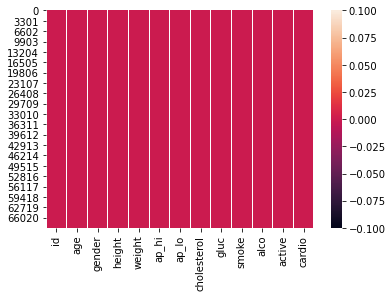

In [7]:
# Lets check the missing values
sns.heatmap(df.isnull())
plt.show()
# There does not sees any missing values

In [8]:
# Lets confirm about missing value once more
df.isnull().sum()
#Hence we are now sure there are no missing values 

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
# Lets see the descriptive statistics
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#Lets see the correlation among the different features as well as with target
df.corr()
# we can see some features have positive correlation with target and some have negative

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


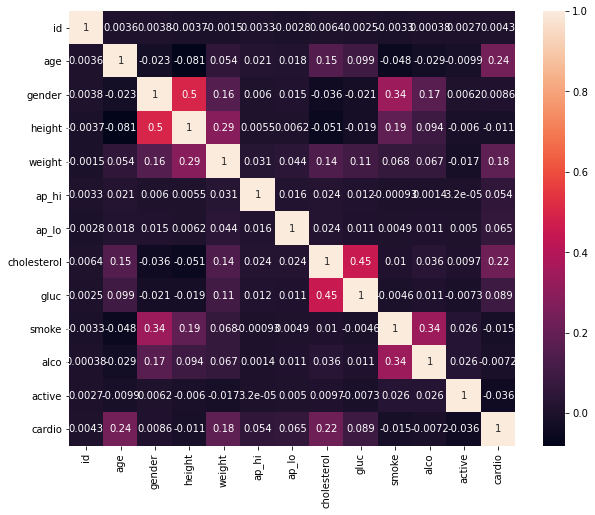

In [11]:
# lets visualize the correlation with heat map
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)


In [12]:
# Lets see target distribution
df['cardio'].value_counts()
# Dataset is fairly balanced

0    34679
1    34622
Name: cardio, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000C591A53A90>,
      dtype=object)

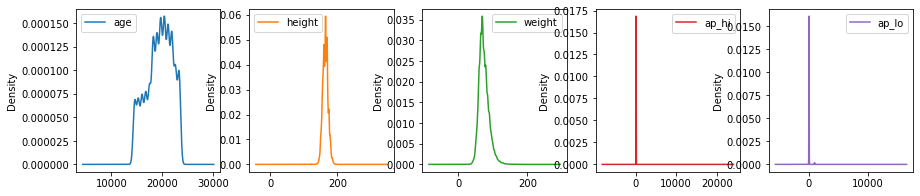

In [13]:
# # Univariate Density Plots of non categorical variables
df[['age','height','weight','ap_hi','ap_lo']].plot(kind='density', subplots=True, layout=(1,5), sharex=False, figsize=(15,3))



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000C591575A58>,
      dtype=object)

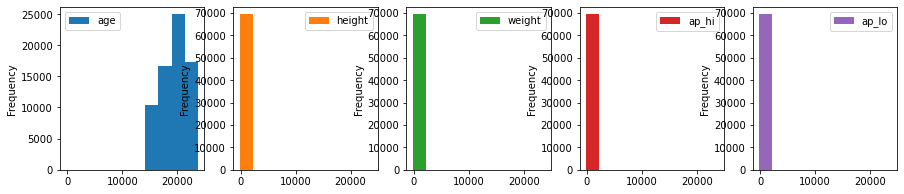

In [14]:
#Lets visualize distribution of non categorical data
df[['age','height','weight','ap_hi','ap_lo']].plot(kind='hist', subplots=True, layout=(1,5), sharex=False, sharey= False, figsize=(15,3))


age          AxesSubplot(0.125,0.125;0.133621x0.755)
height    AxesSubplot(0.285345,0.125;0.133621x0.755)
weight     AxesSubplot(0.44569,0.125;0.133621x0.755)
ap_hi     AxesSubplot(0.606034,0.125;0.133621x0.755)
ap_lo     AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

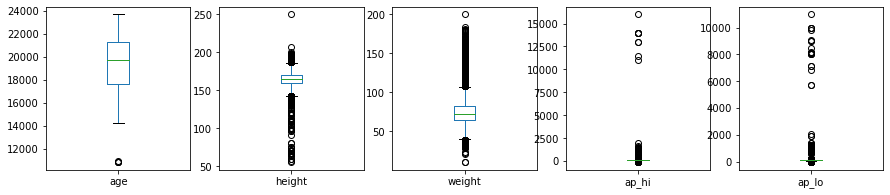

In [15]:
#Lets plot the box plot of each numeric variable
df[['age','height','weight','ap_hi','ap_lo']].plot(kind='box', subplots=True, layout=(1,5), sharex=False, sharey=False, figsize=(15,3))
#There seems the presence of few outliers in the data

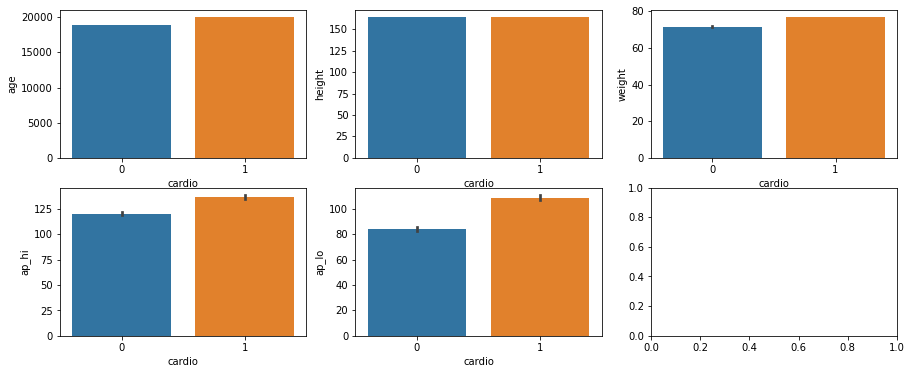

In [16]:
#Lets visualize relation of numeric paramters with respect to 'Target'
f,axes= plt.subplots(2,3, figsize=(15,6))
sns.barplot(x='cardio', y ='age', data=df,ax=axes[0,0])
sns.barplot(x='cardio', y ='height', data=df, ax=axes[0,1])
sns.barplot(x='cardio', y ='weight', data=df, ax=axes[0,2])
sns.barplot(x='cardio', y ='ap_hi', data=df, ax=axes[1,0])
sns.barplot(x='cardio', y ='ap_lo', data=df, ax=axes[1,1])



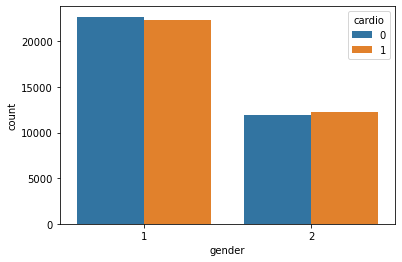

In [17]:
#Lets visualize relation of gender with respect to 'cardio'
sns.countplot(x='gender', hue ='cardio', data=df)


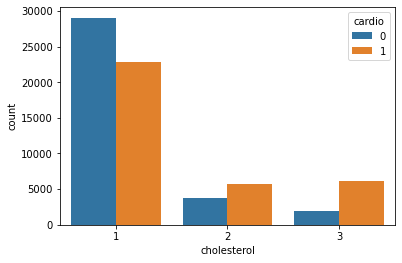

In [18]:
#Lets visualize relation of cholesterol with respect to 'cardio'
sns.countplot(x='cholesterol', hue ='cardio', data=df)
#We can clearly see that patients with cholestrol well above normal have highest chances of cardio disease followed by patients having cholestrol above normal 


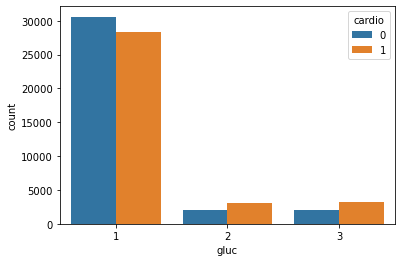

In [19]:
#Lets visualize relation of glucose level with respect to 'cardio'
sns.countplot(x='gluc', hue ='cardio', data=df)
# #We can clearly see that patients with glucose level > normal have higher chances of cardio dieases


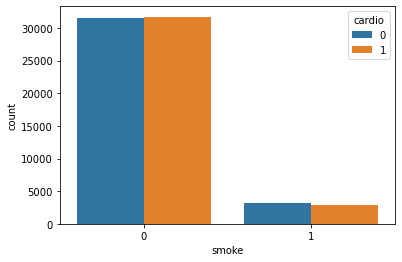

In [20]:
#Lets visualize relation of smoke habits with respect to 'cardio'
sns.countplot(x='smoke', hue ='cardio', data=df)
# We can't clearly make an inference from this

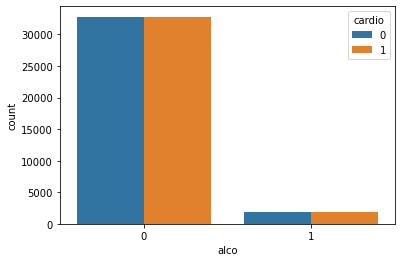

In [21]:
#Lets visualize relation of alcohol consumption with respect to 'cardio'
sns.countplot(x='alco', hue ='cardio', data=df)
# seems alcohol intake does not make any impact on cardio disease


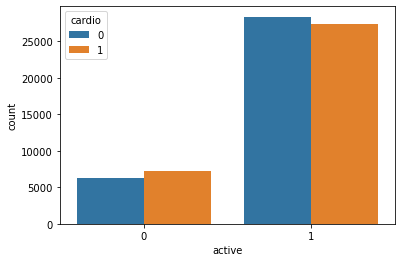

In [22]:
#Lets visualize relation of physical activity with respect to 'cardio'
sns.countplot(x='active', hue ='cardio', data=df)
# As expected we can see that physical active people have lesser chances of cardio disease


In [23]:
#As id is unique for every patient lets drop it
df.drop('id',axis=1,inplace=True)

In [24]:
#Lets check the columns again
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [25]:
# Lets remove the outliers if any
from scipy.stats import zscore
z_score =abs(zscore(df))
dfx = df.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', df.shape)
print('The shape of dataframe after removing outliers is =', dfx.shape)
# There were few outliers which have been removed

The shape of original dataframe was = (69301, 12)
The shape of dataframe after removing outliers is = (55140, 12)


In [26]:
# Let us seperate the features and Target
x=dfx.drop(['cardio'],axis=1)    
y=dfx[['cardio']]

In [27]:
#lets see first 5 rows of x
x.head()
# x now contains only features

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,22469,1,155,69.0,130,80,2,2,0,0,1
1,14648,1,163,71.0,110,70,1,1,0,0,1
2,21901,1,165,70.0,120,80,1,1,0,0,1
4,23393,1,155,62.0,120,80,1,1,0,0,1
5,21143,1,164,61.0,100,70,1,1,0,0,1


In [28]:
#Lets check first five rows of target
y.head()
# y now contains only target variable

,cardio
0,0
1,1
2,0
4,0
5,0


In [29]:
#As it is a classification problem lets import require metrics from  libraries
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve,confusion_matrix

In [30]:
#Lets see which of the algorithims performs well on the given data
# A good way to check their performance is  k fold cross validation
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [31]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('LDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier(random_state=5))])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))




In [32]:
#Let us check which model will perform well on the given data on the basis of mean  kfold crossval score and its std dev
results = []
names = []
for name, model in pipelines: 
    kfold = KFold(n_splits=5, random_state=1) 
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy') 
    results.append(cv_results.mean()) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.725680 (0.003085)
LDA: 0.722978 (0.003759)
KNN: 0.695938 (0.003198)
DT: 0.631211 (0.002556)
NB: 0.699746 (0.002032)
SVM: 0.733061 (0.002790)


In [33]:
#Lets see the comparision
Comparisonc = pd.DataFrame({'ModelName':names,'cross_val_accuracy': results})
Comparisonc.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy
5,SVM,0.733061
0,LR,0.725680
1,LDA,0.722978
4,NB,0.699746
2,KNN,0.695938
3,DT,0.631211


In [34]:
#lets  see if any of the three chosen ensemble technique  with default paramters can give improved accuracy
#lETS CREATE PIPLELINE FOR ENSEMBLE TECHNIQUE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
pipelines1 = []
pipelines1.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(random_state=5))])))
pipelines1.append(('ADC', Pipeline([('Scaler', StandardScaler()),('ADC', AdaBoostClassifier(random_state=5))])))
pipelines1.append(('GBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingClassifier(random_state=5))])))

In [35]:
#lets  see if any of the three chosen ensemble technique  with default paramters can give improved accuracy

results1 = []
names1 = []
kfold = KFold(n_splits=5, random_state=1)
for name, model in pipelines1: 
    cv_results1 = cross_val_score(model, x, y, cv=kfold, scoring='accuracy') 
    results1.append(cv_results1.mean()) 
    names1.append(name) 
    msg1 = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg1)

RF: 0.710482 (0.003491)
ADC: 0.728926 (0.002223)
GBC: 0.733225 (0.003640)


In [36]:
Comparisonn = pd.DataFrame({'ModelName':names1,'cross_val_accuracy': results1})
Comparisonn.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy
2,GBC,0.733225
1,ADC,0.728926
0,RF,0.710482


In [37]:
#Lets see the comparison of all the algorithms
finalcomparison = pd.concat([Comparisonc,Comparisonn])
finalcomparison.sort_values(by='cross_val_accuracy',ascending =False)

,ModelName,cross_val_accuracy
2,GBC,0.733225
5,SVM,0.733061
1,ADC,0.728926
0,LR,0.725680
1,LDA,0.722978
0,RF,0.710482
4,NB,0.699746
2,KNN,0.695938
3,DT,0.631211


In [38]:
# We can see that Gradient Boosting, ,SVM,ADC,LR AND LDA  are very close in performance
#  Lets select GBC for implementation as its has best kfold cross val accuracy

#Lets try to tune paramters of GBC  to find better cross val score

In [39]:
#Lets try to check if  cross val performance of GBC can be increased by tuning parameters
from sklearn.model_selection import GridSearchCV
kfoldx = KFold(n_splits=5, random_state=1) 
scaler = StandardScaler().fit(x)
scaledX = scaler.transform(x)

parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
param_grid = parameters

model = GradientBoostingClassifier(random_state=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfoldx,n_jobs=-1,verbose=1)
grid_result = grid.fit(scaledX, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 54.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 65.9min finished


In [40]:
#Lets check best cross val score
grid_result.best_score_


0.7335328255350018

In [41]:
#Lets check best parameters
grid_result.best_params_ 

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

In [42]:
# Lets import the library to split train and test data
from sklearn.model_selection import train_test_split

In [43]:
#Lets find out the best random state for selected Gradient boosting classifier for best paramters

max_accuracy=0
gb = GradientBoostingClassifier(learning_rate = 0.1, max_depth= 3, n_estimators= 250,random_state=5)

for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=i)
    ss = StandardScaler()
    X_train= ss.fit_transform(X_train)
    X_test= ss.transform(X_test)
    gb.fit(X_train,y_train)
    ypreds=gb.predict(X_test)
    accuracy=accuracy_score(y_test, ypreds)
    print('At random state ', i, 'the value of accuracy is ', accuracy)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        finalstate=i
print()
print()
print('max accuracy is', max_accuracy,'at random state' , finalstate)

At random state  1 the value of accuracy is  0.7290533188248096
At random state  2 the value of accuracy is  0.7357635110627494
At random state  3 the value of accuracy is  0.7308668842945231
At random state  4 the value of accuracy is  0.7298694232861807
At random state  5 the value of accuracy is  0.7278745012694958
At random state  6 the value of accuracy is  0.7256982227058397
At random state  7 the value of accuracy is  0.7257889009793254
At random state  8 the value of accuracy is  0.736126224156692
At random state  9 the value of accuracy is  0.7367609720710918
At random state  10 the value of accuracy is  0.7290533188248096
At random state  11 the value of accuracy is  0.7199854914762422
At random state  12 the value of accuracy is  0.7310482408414943
At random state  13 the value of accuracy is  0.744740660137831
At random state  14 the value of accuracy is  0.7297787450126949
At random state  15 the value of accuracy is  0.730594849474066
At random state  16 the value of accu

In [44]:
#Lets build the model using the best random state and best parameters
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 13)
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)
gbc = GradientBoostingClassifier(learning_rate = 0.1, max_depth= 3, n_estimators= 250,random_state=5)
gbc.fit(X_train,y_train)
ypred=gbc.predict(X_test)
accuracy= accuracy_score(y_test,ypred)
print('accuracy is', accuracy)

accuracy is 0.744740660137831


In [45]:
# Lets save the predicted result to a csv file
dfpr = pd.DataFrame(ypred,columns=['Predicted_values'])
dfpr.to_csv('cardiovascular_prediction.csv')

In [46]:
#Lets print the confusion matrix
print('confusion matrix = ',confusion_matrix(y_test,ypred))

confusion matrix =  [[4531 1142]
 [1673 3682]]


In [47]:
#Lets print the classification report
print('classification report = ',classification_report(y_test,ypred))

classification report =                precision    recall  f1-score   support

           0       0.73      0.80      0.76      5673
           1       0.76      0.69      0.72      5355

    accuracy                           0.74     11028
   macro avg       0.75      0.74      0.74     11028
weighted avg       0.75      0.74      0.74     11028



AUC: 0.743


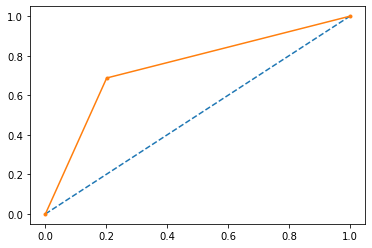

In [48]:
# calculate AUC
auc = roc_auc_score(y_test, ypred)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, ypred)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

In [49]:
# Lets dump our final model into pkl file
from sklearn.externals import joblib
joblib.dump(gbc,'gbc_cardio.pkl')

['gbc_cardio.pkl']